In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [37]:
# Load the data from the Excel file
file_path = 'coba_olah.xlsx'  # Replace with your file path
sheet_name = "2 0 7 0 1"
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Assuming 'x' and 'y' are the column names in your Excel file
x = data['Acceleration voltage U_B / V']
y = data['Collector current I_A / nA']

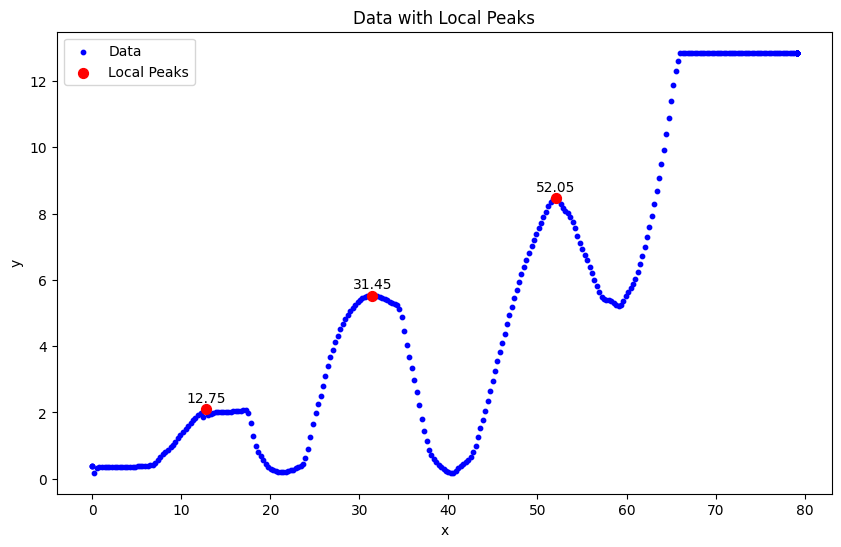

In [39]:
# Find local peaks in the y data
peaks, _ = find_peaks(y,distance=30)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data', color='blue', s=10)
plt.scatter(x[peaks], y[peaks], color='red', label='Local Peaks', s=50)  # Marking peaks

# Annotate each peak with its x-coordinate
for peak in peaks:
    plt.annotate(f"{x[peak]:.2f}", (x[peak], y[peak]), textcoords="offset points", xytext=(0,5), ha='center')
# plt.ylim(0,1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data with Local Peaks')
plt.legend()
plt.show()

In [18]:
# Load the data from the Excel file
file_path = 'coba_olah.xlsx'  # Replace with your file path
excel_data = pd.ExcelFile(file_path)  # Load the Excel file with multiple sheets

In [26]:
def remove_value(data, x):
    return [value for value in data if value != x]

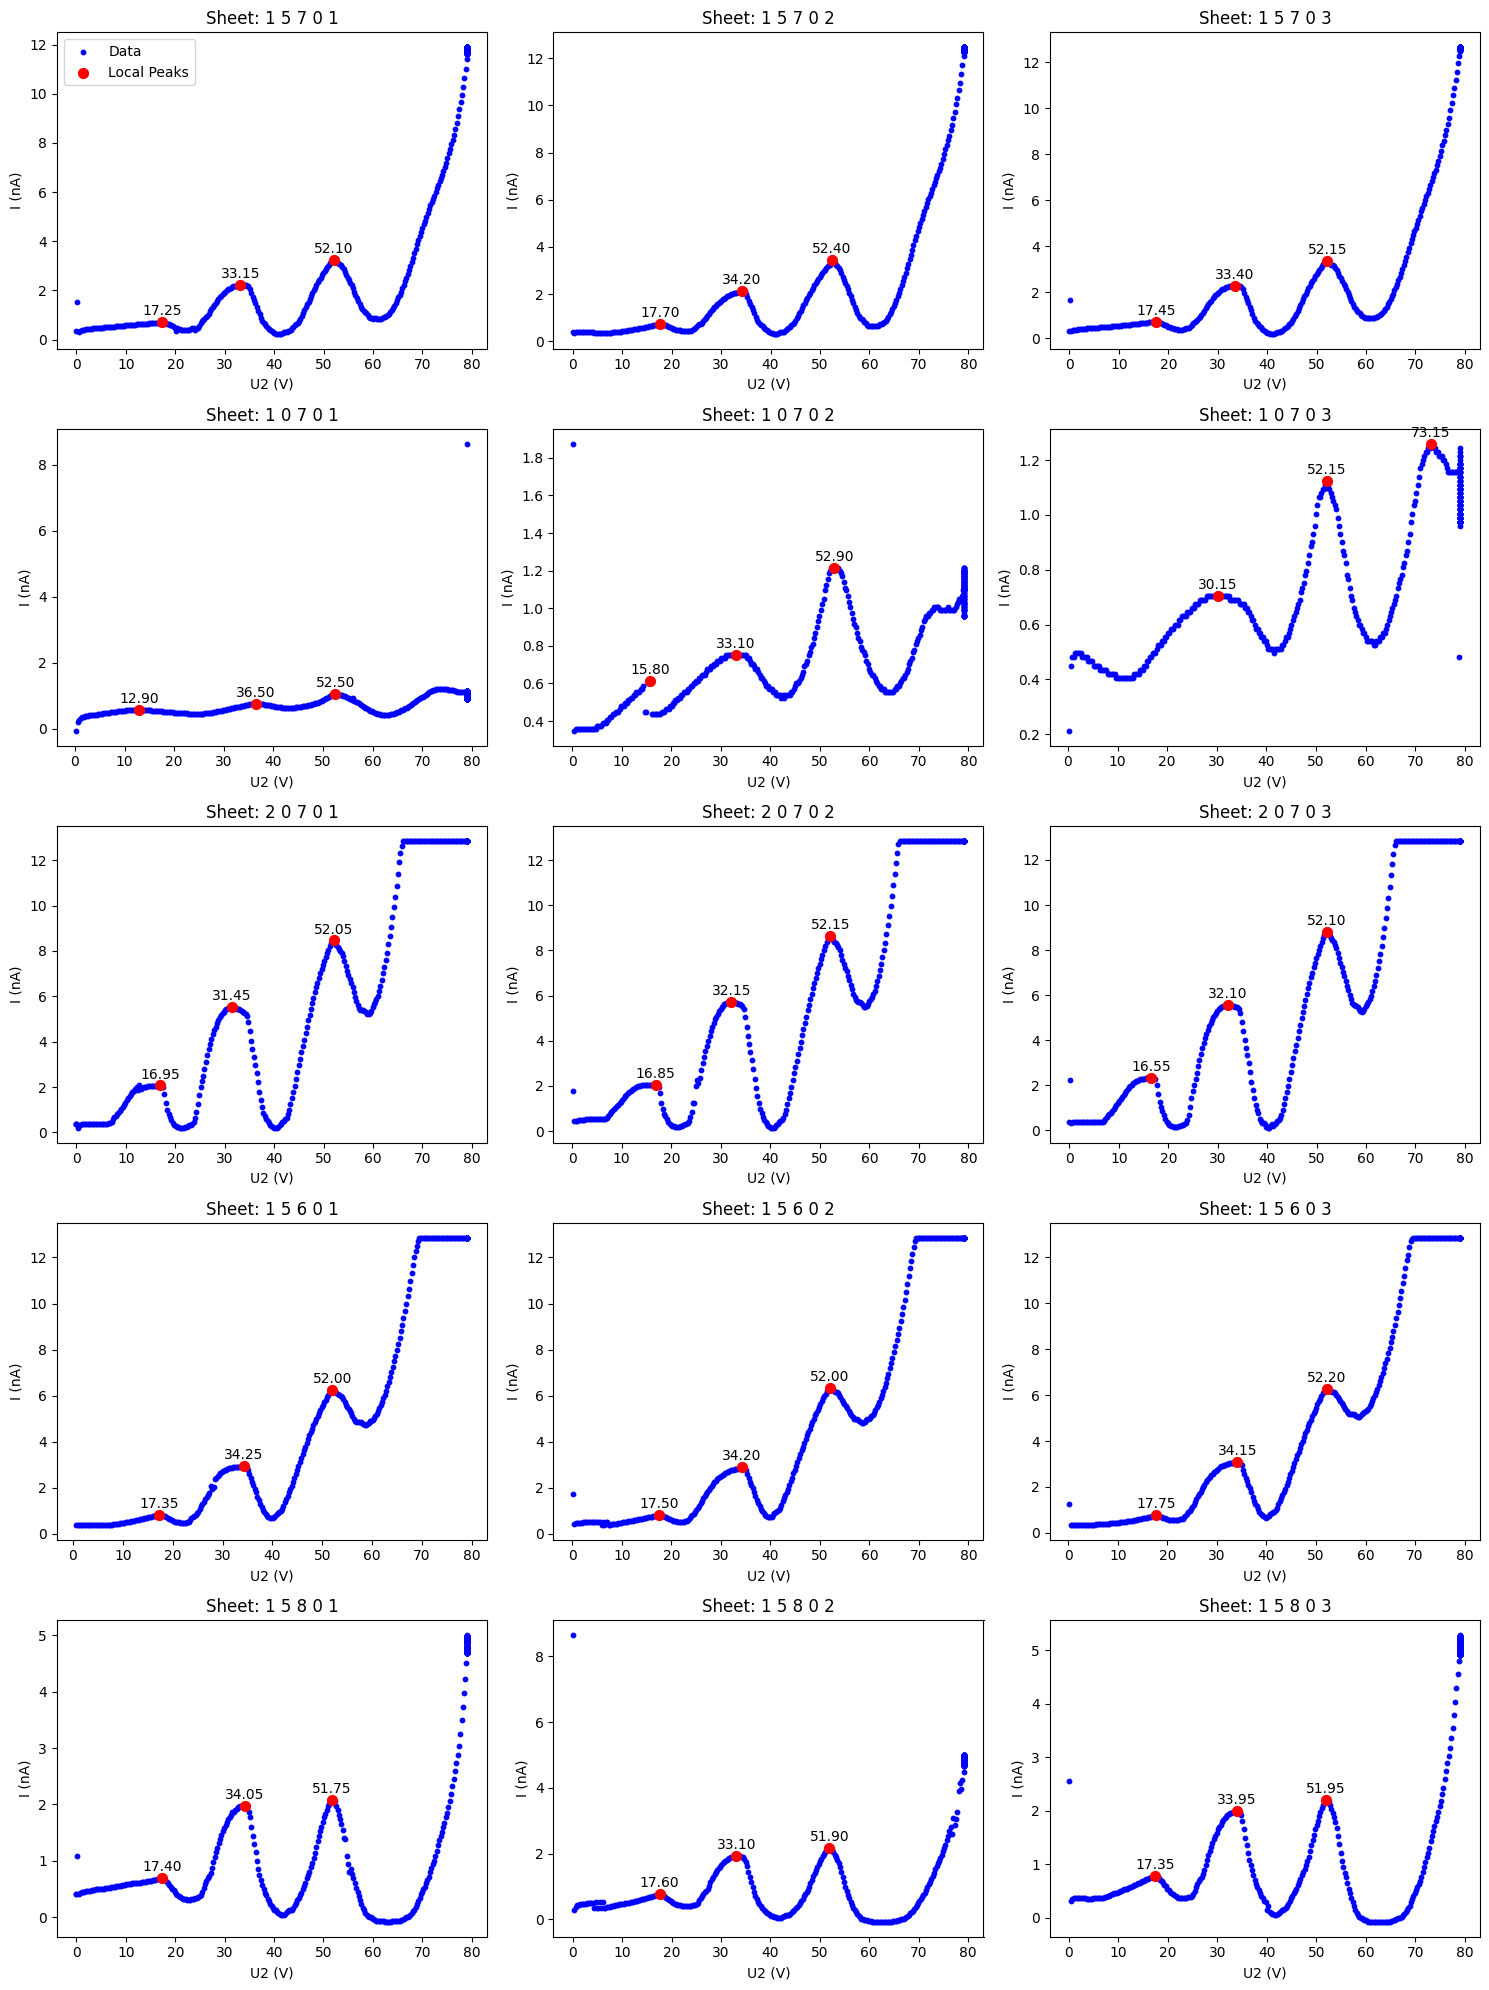

In [ ]:
# gambaran semuanya

# Set up a figure with subplots
num_sheets = len(excel_data.sheet_names)  # Adjusts based on the actual number of sheets
fig, axes = plt.subplots(5, 3, figsize=(15, 20))  # Creates a 5x3 grid for 15 sheets
axes = axes.flatten()  # Flatten for easier iteration
n=0

# Loop through each sheet
for i, sheet_name in enumerate(excel_data.sheet_names[:15]):  # Limit to 15 sheets
    n+=1 # grafik k berapa

    # Load data from the current sheet
    data = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # Assuming 'x' and 'y' columns in each sheet
    x = data['Acceleration voltage U_B / V']
    y = data['Collector current I_A / nA']
    
    # Find local peaks in the y data
    peaks0, _ = find_peaks(y, distance=30)
    if(n==7): # fine tune graph ke4
        y_dummy = y.copy()
        y_dummy[:52] = [0 for i in range(52)]
        peaks0, _ = find_peaks(y_dummy, distance=30)

    # remove x lower than 10V, higher than 70V
    peaks1 = np.array(peaks0)
    threshold_x= 255
    peaks = peaks1[(peaks1 <= 274) & (peaks1 >=25)]
    if(n==4):
        peaks = peaks1[(peaks1 <= 255) & (peaks1 >=25)]
    # print(peaks)

    peaks2 = peaks.copy()
    ref = y[peaks[0]]
    for j in peaks:
        if(y[j]<ref):
            peaks2 = remove_value(peaks,j)
        
        else:
            ref= y[j]
    peaks = peaks2

    # Scatter plot for the current sheet in its subplot
    axes[i].scatter(x, y, color='blue', s=10, label='Data')
    axes[i].scatter(x[peaks], y[peaks], color='red', s=50, label='Local Peaks')
    
    # Annotate each peak with its x-coordinate
    for peak in peaks:
        axes[i].annotate(f"{x[peak]:.2f}", (x[peak], y[peak]), textcoords="offset points", xytext=(0,5), ha='center')
    
    # Set titles and labels for each subplot
    axes[i].set_title(f'Sheet: {sheet_name}')
    axes[i].set_xlabel('U2 (V)')
    axes[i].set_ylabel('I (nA)')

# Hide any unused subplots if there are less than 15 sheets
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap and show the legend only once
plt.tight_layout()
axes[0].legend(loc='upper left')  # Show legend in the first subplot only
plt.show()